In [10]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 12
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Custom Code Import
%autoreload 2
from fooof.fooof import *

## MEG Data

In [22]:
from om.core.db import OMDB
from om.core.io import load_meg_psds

In [23]:
# Get database and path details from OMDB class
db = OMDB()
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD')


Number of Subjects available: 103

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341, 100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671, 601127, 660951, 662551, 665254, 667056, 706040, 707749, 715950, 725751, 735148, 783462, 814649, 877168, 891667, 898176, 912447, 917255, 990366]



In [24]:
# Get PSD files
psd_files, _ = db.check_dat_files('PSD', verbose=False)

In [25]:
# Load MEG Data
subj = 352132
psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [35]:
# OR: load MEG data from npy file

#dat = np.load('meg_dat.npy')
#freqs = dat[0]
#psd = dat[1]

In [36]:
# Set which PSD to run
cur_psd = psd[1000, :]

In [37]:
# Fix up PSD
psd_array = np.log10(cur_psd)
psd_array = np.vstack((psd_array, psd_array))
psd_array = psd_array.T

In [28]:
# FOOOF SETTINGS
window_around_max = 3
number_of_gaussians = 6
cut_freqs = [3, 40]
freq_range = cut_freqs

In [29]:
# Run FOOOF
p_flat_real, frequency_vector, trimmed_psd, psd_fit, background_fit, gaussian_fit, background_params, oscillation_params = \
    fooof(freqs, psd_array, cut_freqs, number_of_gaussians, window_around_max)

In [30]:
oscillation_params

[[10.867105080261901, 0.33905339909400256, 2.0482346752042977],
 [8.273379864085431, 0.31133715115937566, 0.83042745618160718],
 [2.832043839523847, 0.25174529412074886, 0.55589559842968406],
 [23.263344837759785, 0.13884530074207721, 1.6985510779333515],
 [17.416143977226433, 0.16213001319356377, 1.0176904757839356]]

In [31]:
# Optimize FOOOF
guess = oscillation_params
guess = sorted(guess, key=itemgetter(1), reverse=True)

popt, _ = curve_fit(gaussian_function, frequency_vector, p_flat_real, p0=guess, maxfev=5000)
multi_fit = gaussian_function(frequency_vector, *popt)

In [32]:
print(background_params, '\n')
for ll in oscillation_params: print(ll)
print('\n')
print(popt)

[-22.31165951   1.25776805  -0.91091896] 

[10.867105080261901, 0.33905339909400256, 2.0482346752042977]
[8.273379864085431, 0.31133715115937566, 0.83042745618160718]
[2.832043839523847, 0.25174529412074886, 0.55589559842968406]
[23.263344837759785, 0.13884530074207721, 1.6985510779333515]
[17.416143977226433, 0.16213001319356377, 1.0176904757839356]


[ 11.40334232   0.42779228   1.09160278   8.50253307   0.38446776
   1.10312628   2.83204505   0.25174487   0.55589879  17.41401692
   0.16192738   1.0214367   23.26108621   0.1386397    1.70471595]


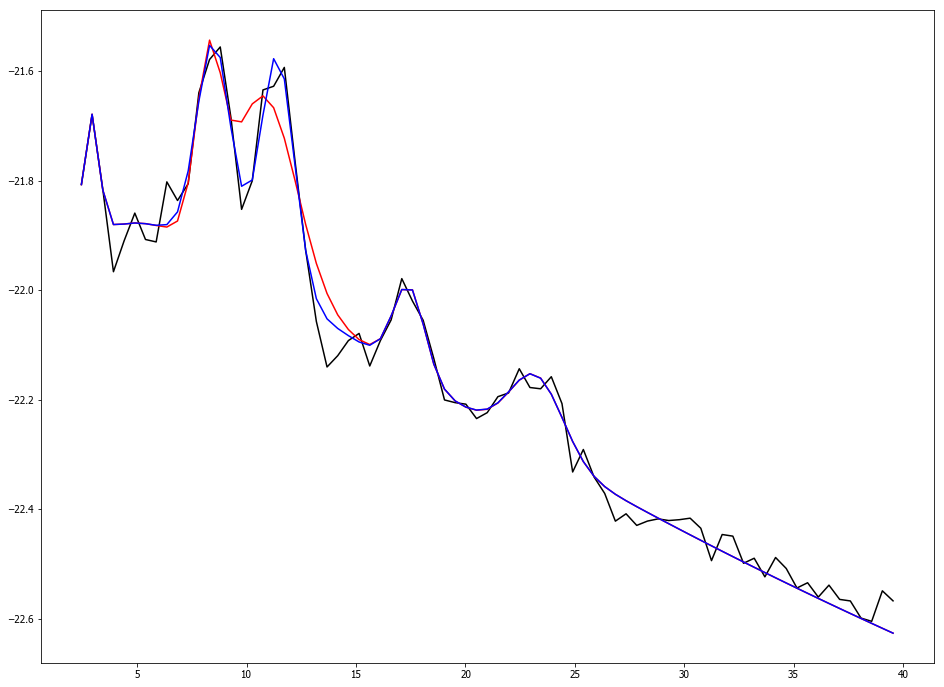

In [33]:
# Plot FOOOF Fits
plt.plot(frequency_vector, trimmed_psd, 'k')
plt.plot(frequency_vector, psd_fit, 'r')
plt.plot(frequency_vector, multi_fit+background_fit, 'b')
plt.show()

### EEG Data

In [41]:
# Load
dat = np.load('data-for-tom.npy').item()

# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [42]:
# Grab psd of interest
psd = dat[0][0]['eyesc']

In [43]:
psd_array = np.log10(psd)
psd_array = np.vstack((psd_array, psd_array))
psd_array = psd_array.T

In [48]:
# FOOOF SETTINGS
window_around_max = 3
number_of_gaussians = 6
cut_freqs = [3, 40]
freq_range = cut_freqs

In [49]:
# Run FOOOF
p_flat_real, frequency_vector, trimmed_psd, psd_fit, background_fit, gaussian_fit, background_params, oscillation_params = \
    fooof(freqs, psd_array, cut_freqs, number_of_gaussians, window_around_max)

In [50]:
# Optimize FOOOF
guess = oscillation_params
guess = sorted(guess, key=itemgetter(1), reverse=True)

popt, _ = curve_fit(gaussian_function, frequency_vector, p_flat_real, p0=guess, maxfev=5000)
multi_fit = gaussian_function(frequency_vector, *popt)

In [51]:
print(background_params, '\n')
for ll in oscillation_params: print(ll)
print('\n')
print(popt)

[-0.11003858  0.48691156 -0.51823571] 

[18.654550971594965, 0.24774289272059216, 1.7631534289504214]
[9.9783951250748562, 0.85903009993739199, 1.6969542786521177]


[  9.98792271   0.85428039   1.71928035  18.65437192   0.24770674
   1.76371517]


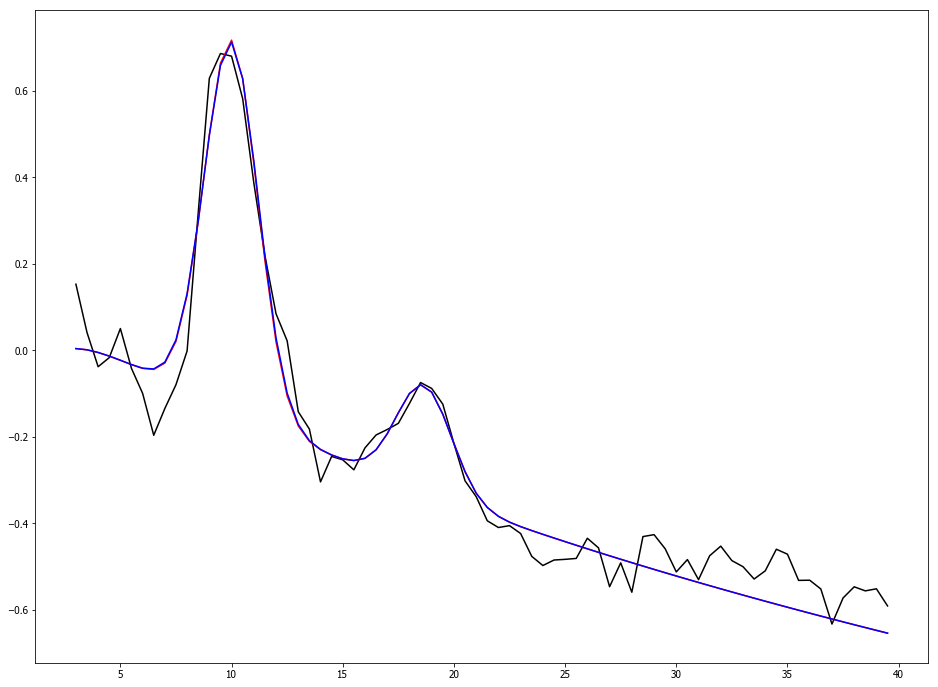

In [52]:
# Plot FOOOF Fits
plt.plot(frequency_vector, trimmed_psd, 'k')
plt.plot(frequency_vector, psd_fit, 'r')
plt.plot(frequency_vector, multi_fit+background_fit, 'b')
plt.show()